In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
sales_data = pd.read_csv("sales_2019.csv")

In [3]:
sales_data['Date'] = sales_data['Order Date'].str.split(' ').str[0]

In [4]:
print(sales_data)

        Order ID                     Product  Quantity Ordered  Price Each  \
0         141234                      iPhone                 1      700.00   
1         141235    Lightning Charging Cable                 1       14.95   
2         141236            Wired Headphones                 2       11.99   
3         141237            27in FHD Monitor                 1      149.99   
4         141238            Wired Headphones                 1       11.99   
...          ...                         ...               ...         ...   
185945    319666    Lightning Charging Cable                 1       14.95   
185946    319667       AA Batteries (4-pack)                 2        3.84   
185947    319668             Vareebadd Phone                 1      400.00   
185948    319669            Wired Headphones                 1       11.99   
185949    319670  Bose SoundSport Headphones                 1       99.99   

              Order Date                        Purchase Addres

In [5]:
sales_data['Date'] = pd.to_datetime(sales_data['Date'])

In [6]:
sales_data['Total Revenue'] = sales_data['Quantity Ordered'] * sales_data['Price Each']

In [7]:
sales_data['Date'] = sales_data['Date'].dt.to_period("D")
daily_sales = sales_data.groupby('Date').sum().reset_index()

C:\Users\16096\AppData\Local\Temp\ipykernel_28244\2410723274.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily_sales = sales_data.groupby('Date').sum().reset_index()


In [8]:
daily_sales['Date'] = daily_sales['Date'].dt.to_timestamp()

In [9]:
sales_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Date,Total Revenue
0,141234,iPhone,1,700.00,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215",2019-01-22,700.00
1,141235,Lightning Charging Cable,1,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035",2019-01-28,14.95
2,141236,Wired Headphones,2,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016",2019-01-17,23.98
3,141237,27in FHD Monitor,1,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001",2019-01-05,149.99
4,141238,Wired Headphones,1,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301",2019-01-25,11.99


In [10]:
daily_sales.head(12)

,Date,Order ID,Quantity Ordered,Price Each,Total Revenue
0,2019-01-01,44021745,343,65420.91,65681.94
1,2019-01-02,47185173,368,70407.84,70813.20
2,2019-01-03,43159194,330,46793.74,47046.20
3,2019-01-04,42839800,330,61779.51,62012.21
4,2019-01-05,44984833,355,46160.62,46524.63
5,2019-01-06,42485816,319,52500.25,52777.49
6,2019-01-07,44962776,343,53493.66,53676.42
7,2019-01-08,41387396,318,55868.09,56112.47
8,2019-01-09,46124107,357,54944.27,55153.13
9,2019-01-10,49060744,368,56114.35,56660.92


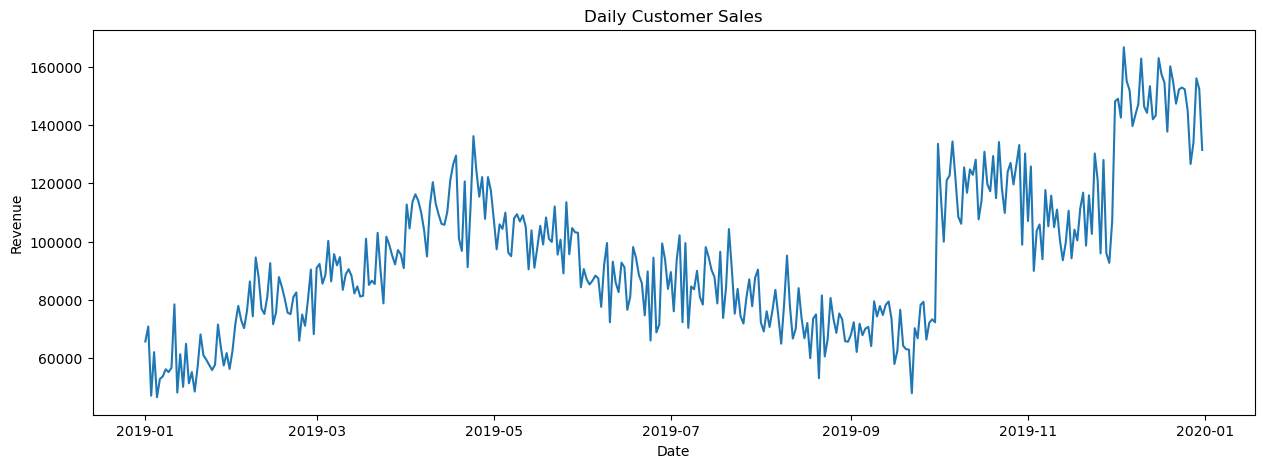

In [11]:
daily_sales.drop(daily_sales.tail(1).index,inplace=True)
plt.figure(figsize=(15,5))
plt.plot(daily_sales['Date'], daily_sales['Total Revenue'])
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Daily Customer Sales")
plt.show()

In [12]:
daily_sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Date              365 non-null    datetime64[ns]
 1   Order ID          365 non-null    int64         
 2   Quantity Ordered  365 non-null    int64         
 3   Price Each        365 non-null    float64       
 4   Total Revenue     365 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(2)
memory usage: 14.4 KB


In [13]:
daily_sales['sales_diff'] = daily_sales['Total Revenue'].diff()
daily_sales = daily_sales.dropna()
daily_sales.head()

,Date,Order ID,Quantity Ordered,Price Each,Total Revenue,sales_diff
1,2019-01-02,47185173,368,70407.84,70813.20,5131.26
2,2019-01-03,43159194,330,46793.74,47046.20,-23767.00
3,2019-01-04,42839800,330,61779.51,62012.21,14966.01
4,2019-01-05,44984833,355,46160.62,46524.63,-15487.58
5,2019-01-06,42485816,319,52500.25,52777.49,6252.86


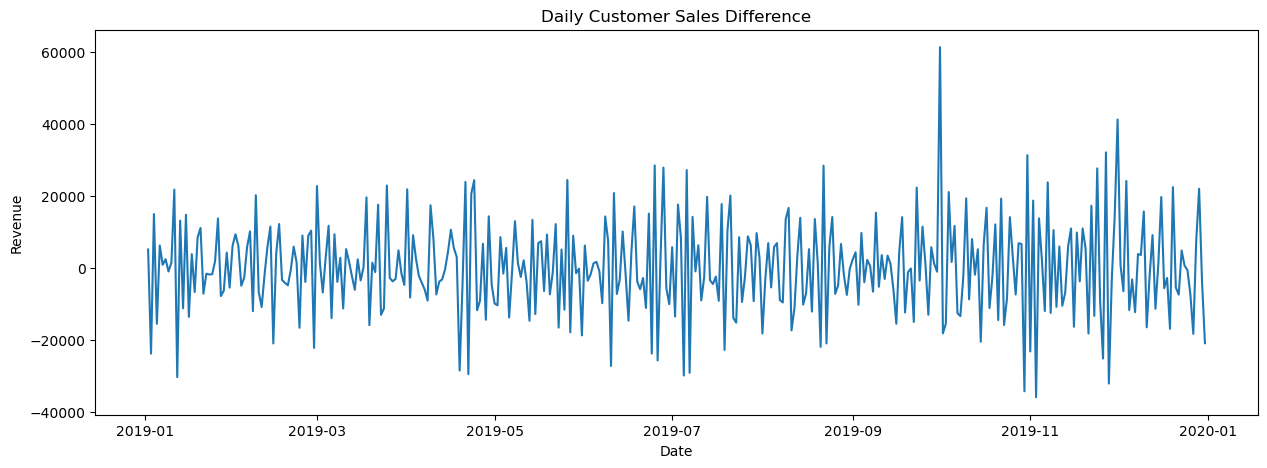

In [14]:
plt.figure(figsize=(15,5))
plt.plot(daily_sales['Date'], daily_sales['sales_diff'])
plt.xlabel("Date")
plt.ylabel("Revenue")
plt.title("Daily Customer Sales Difference")
plt.show()

In [15]:
supervised_data = daily_sales.drop(['Date', 'Order ID'], axis=1)

In [16]:
column_to_move = supervised_data.pop("Total Revenue")
supervised_data.insert(0,"Total Revenue", column_to_move)

In [17]:
print(supervised_data.head(13))

    Total Revenue  Quantity Ordered  Price Each  sales_diff
1        70813.20               368    70407.84     5131.26
2        47046.20               330    46793.74   -23767.00
3        62012.21               330    61779.51    14966.01
4        46524.63               355    46160.62   -15487.58
5        52777.49               319    52500.25     6252.86
6        53676.42               343    53493.66      898.93
7        56112.47               318    55868.09     2436.05
8        55153.13               357    54944.27     -959.34
9        56660.92               368    56114.35     1507.79
10       78414.54               363    78304.82    21753.62
11       48126.41               340    47792.25   -30288.13
12       61284.39               368    61021.67    13157.98
13       50090.48               324    49844.91   -11193.91


In [18]:
train_data = supervised_data[:-91] 
test_data = supervised_data[-91:]
print("Train Data Shape: ", train_data.shape)
print("Test Data Shape: ", test_data.shape)

Train Data Shape:  (273, 4)
Test Data Shape:  (91, 4)


In [19]:
scaler = MinMaxScaler(feature_range=(-1,1))
scaler.fit(train_data)
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)

In [20]:
X_train, y_train = train_data[:,1:], train_data[:,0:1]
X_test, y_test = test_data[:,1:], test_data[:,0:1]
y_train = y_train.ravel()
y_test = y_test.ravel()
print("X_train Shape: ", X_train.shape)
print("y_train Shape: ", y_train.shape)
print("X_test Shape: ", X_test.shape)
print("y_test Shape: ", y_test.shape)

X_train Shape:  (273, 3)
y_train Shape:  (273,)
X_test Shape:  (91, 3)
y_test Shape:  (91,)


In [21]:
sales_dates = daily_sales['Date'][-91:].reset_index(drop=True)
predict_df = pd.DataFrame(sales_dates)

In [22]:
act_sales = daily_sales['Total Revenue'][-92:].to_list()
print(act_sales)

[133545.32, 115401.66, 99928.92, 121014.29, 122682.14, 134384.92, 121833.37, 108477.64, 106094.11, 125440.59, 116730.85, 124765.05, 122900.14, 128103.24, 107623.75, 114107.87, 130827.84, 119705.72, 117261.52, 129369.48, 114909.48, 134168.94, 118348.49, 109809.6, 123926.85, 126993.86, 119612.37, 126483.5, 133132.28, 98910.76, 130232.33, 107058.9, 125772.34, 89898.24, 103673.17, 105864.68000000001, 93916.89, 117692.05, 105236.88, 115754.83, 104955.4, 110945.82, 100467.22, 93579.46, 99578.47, 110547.06, 94234.47, 104077.54, 100369.25, 111336.53, 116783.61, 98591.99, 115879.28, 102594.45, 130244.5, 121062.75, 95920.67, 128022.25, 95941.37, 92666.45, 106936.68000000001, 148153.63, 149025.71, 142570.45, 166727.69, 155079.3, 151910.47, 139645.75, 143527.63, 147135.13, 162832.74, 146367.03, 144195.15, 153332.14, 141991.78, 143269.72, 162970.61, 157364.72, 154598.77, 137732.67, 160181.3, 154756.87, 147348.09, 152214.45, 152888.82, 152268.42, 144912.02, 126628.05, 134015.5, 156024.62, 152319.81,

In [23]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pre = lr_model.predict(X_test)

In [24]:
lr_pre = lr_pre.reshape(-1,1)
lr_pre_test_set = np.concatenate([lr_pre, X_test],axis=1)
lr_pre_test_set = scaler.inverse_transform(lr_pre_test_set)

In [25]:
result_list = []
for index in range(0,len(lr_pre_test_set)):
    result_list.append(lr_pre_test_set[index][0] + act_sales[index])
lr_pre_series = pd.Series(result_list, name="Linear Prediction")
predict_df = predict_df.merge(lr_pre_series, left_index = True, right_index = True)

In [26]:
lr_mse = np.sqrt(mean_squared_error(predict_df['Linear Prediction'], daily_sales['Total Revenue'][-91:]))
lr_mae = mean_absolute_error(predict_df['Linear Prediction'], daily_sales['Total Revenue'][-91:])
lr_r2 = r2_score(predict_df['Linear Prediction'], daily_sales['Total Revenue'][-91:])
print("Linear Regression MSE: ", lr_mse)
print("Linear Regression MAE: ", lr_mae)
print("Linear Regression R2: ", lr_r2)

Linear Regression MSE:  127197.92396063491
Linear Regression MAE:  125580.06616010747
Linear Regression R2:  -10.573471115726553


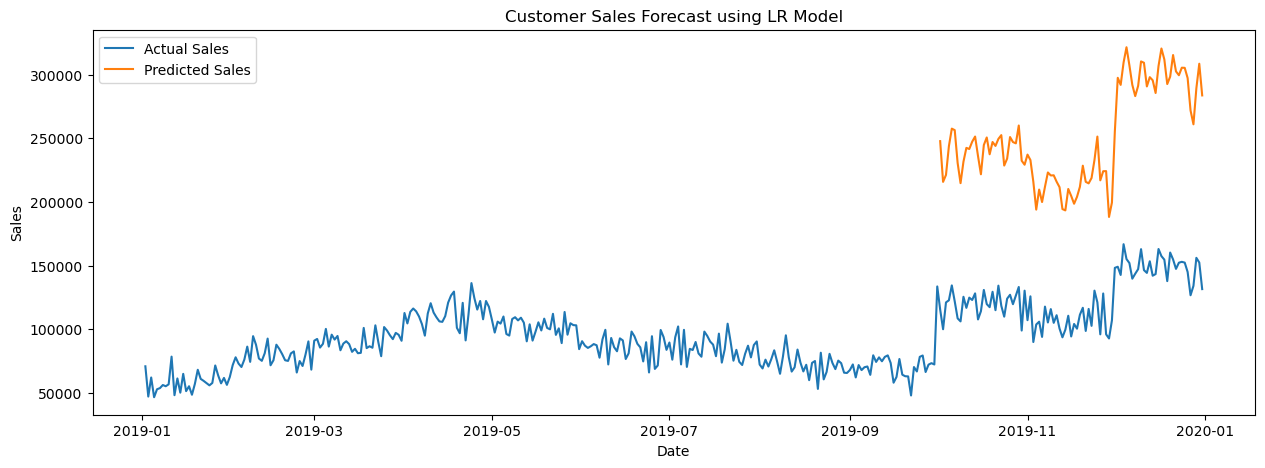

In [27]:
plt.figure(figsize=(15,5))
plt.plot(daily_sales['Date'], daily_sales['Total Revenue'])
plt.plot(predict_df['Date'], predict_df['Linear Prediction'])
plt.title("Customer Sales Forecast using LR Model")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(['Actual Sales', 'Predicted Sales'])
plt.show()

# Linear Regression

In [28]:
supervised_data.drop(supervised_data.tail(1).index,inplace=True)
time = np.arange(1, len(supervised_data) + 1)
supervised_data['time'] = time
supervised_data = supervised_data[['time', 'Total Revenue']]
supervised_data.tail()

,time,Total Revenue
359,359,144912.02
360,360,126628.05
361,361,134015.50
362,362,156024.62
363,363,152319.81


In [29]:
reg = np.polyfit(supervised_data['time'], supervised_data['Total Revenue'], deg=1)
reg

array([  131.66668747, 70489.08558087])

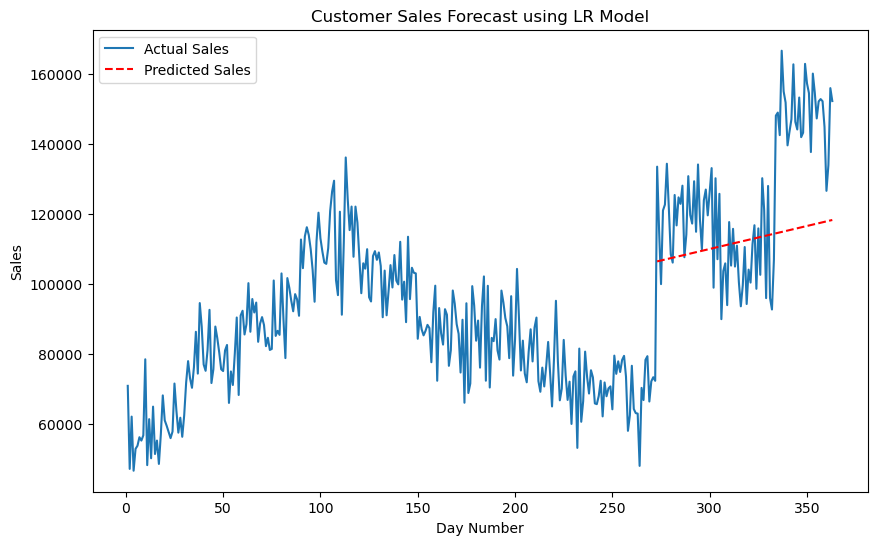

In [30]:
trend = np.polyval(reg,supervised_data['time'][-91:])
plt.figure(figsize=(10,6))
plt.plot(supervised_data['time'], supervised_data['Total Revenue'])
plt.plot(supervised_data['time'][-91:], trend, 'r--')
plt.title("Customer Sales Forecast using LR Model")
plt.xlabel("Day Number")
plt.ylabel("Sales")
plt.legend(['Actual Sales', 'Predicted Sales'])

In [31]:
lr_mse = np.sqrt(mean_squared_error(supervised_data['time'][-91:], supervised_data['Total Revenue'][-91:]))
lr_mae = mean_absolute_error(supervised_data['time'][-91:], supervised_data['Total Revenue'][-91:])
lr_r2 = r2_score(supervised_data['time'][-91:], supervised_data['Total Revenue'][-91:])
print("Linear Regression MSE: ", lr_mse)
print("Linear Regression MAE: ", lr_mae)
print("Linear Regression R2: ", lr_r2)

Linear Regression MSE:  126774.76768423527
Linear Regression MAE:  125158.0342857143
Linear Regression R2:  -23292523.23390119


# Random Forest Regression

In [32]:
random_forest_sales = pd.read_csv("sales_2019.csv")
random_forest_sales.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700.00,1/22/2019 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,1/28/2019 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,1/17/2019 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,1/5/2019 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,1/25/2019 11:59,"387 10th St, Austin, TX 73301"
5,141239,AAA Batteries (4-pack),1,2.99,1/29/2019 20:22,"775 Willow St, San Francisco, CA 94016"
6,141240,27in 4K Gaming Monitor,1,389.99,1/26/2019 12:16,"979 Park St, Los Angeles, CA 90001"
7,141241,USB-C Charging Cable,1,11.95,1/5/2019 12:04,"181 6th St, San Francisco, CA 94016"
8,141242,Bose SoundSport Headphones,1,99.99,1/1/2019 10:30,"867 Willow St, Los Angeles, CA 90001"
9,141243,Apple Airpods Headphones,1,150.00,1/22/2019 21:20,"657 Johnson St, San Francisco, CA 94016"


In [33]:
random_forest_sales['Date'] = random_forest_sales['Order Date'].str.split(' ').str[0]
random_forest_sales['Date'] = pd.to_datetime(random_forest_sales['Date'])

In [34]:
random_forest_sales['Total Revenue'] = random_forest_sales['Quantity Ordered'] * random_forest_sales['Price Each']

In [35]:
random_forest_sales = random_forest_sales.groupby(['Date'])['Total Revenue'].sum().reset_index()
random_forest_sales.head()

,Date,Total Revenue
0,2019-01-01,65681.94
1,2019-01-02,70813.20
2,2019-01-03,47046.20
3,2019-01-04,62012.21
4,2019-01-05,46524.63


In [36]:
random_forest_sales['Week'] = pd.to_datetime(random_forest_sales['Date']).dt.week
random_forest_sales['Day'] = pd.to_datetime(random_forest_sales['Date']).dt.day
random_forest_sales['WeekDay'] = pd.to_datetime(random_forest_sales['Date']).dt.dayofweek

C:\Users\16096\AppData\Local\Temp\ipykernel_28244\2507857892.py:1: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  random_forest_sales['Week'] = pd.to_datetime(random_forest_sales['Date']).dt.week


In [37]:
random_forest_sales.head()

,Date,Total Revenue,Week,Day,WeekDay
0,2019-01-01,65681.94,1,1,1
1,2019-01-02,70813.20,1,2,2
2,2019-01-03,47046.20,1,3,3
3,2019-01-04,62012.21,1,4,4
4,2019-01-05,46524.63,1,5,5


[array([74815.81, 46524.63]), array([109344.1875, 160181.3   ])]

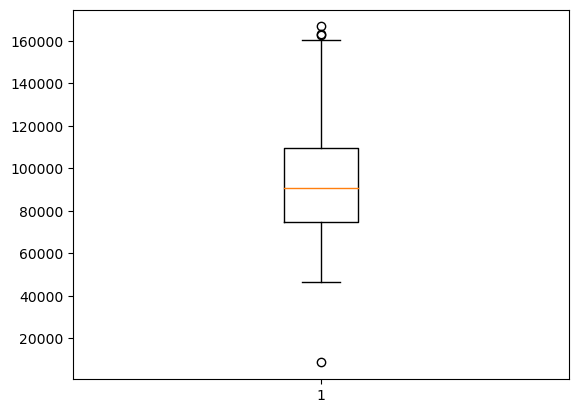

In [38]:
B = plt.boxplot(random_forest_sales['Total Revenue'])
[item.get_ydata()for item in B['whiskers']]

In [39]:
random_forest_sales = random_forest_sales[random_forest_sales['Total Revenue'] < 160181]
random_forest_sales = random_forest_sales[random_forest_sales['Total Revenue'] > 46524]

In [40]:
model = RandomForestRegressor(oob_score = True, n_jobs = 1, random_state = 0,
                              min_samples_leaf = 4, n_estimators = 3000)

In [41]:
predictors = random_forest_sales.drop(['Date', 'Total Revenue'], axis = 1)
target = random_forest_sales['Total Revenue']
x_train, x_cv, y_train, y_cv = train_test_split(predictors, target, test_size = 0.4, random_state = 1)

In [42]:
model.fit(x_train, y_train)

RandomForestRegressor(min_samples_leaf=4, n_estimators=3000, n_jobs=1,
                      oob_score=True, random_state=0)

In [43]:
pred = model.predict(x_cv)

In [44]:
r2_score(pred, y_cv)

0.5823861087114155

In [ ]:
print("Random Forest R2: ", r2_score(pred,))

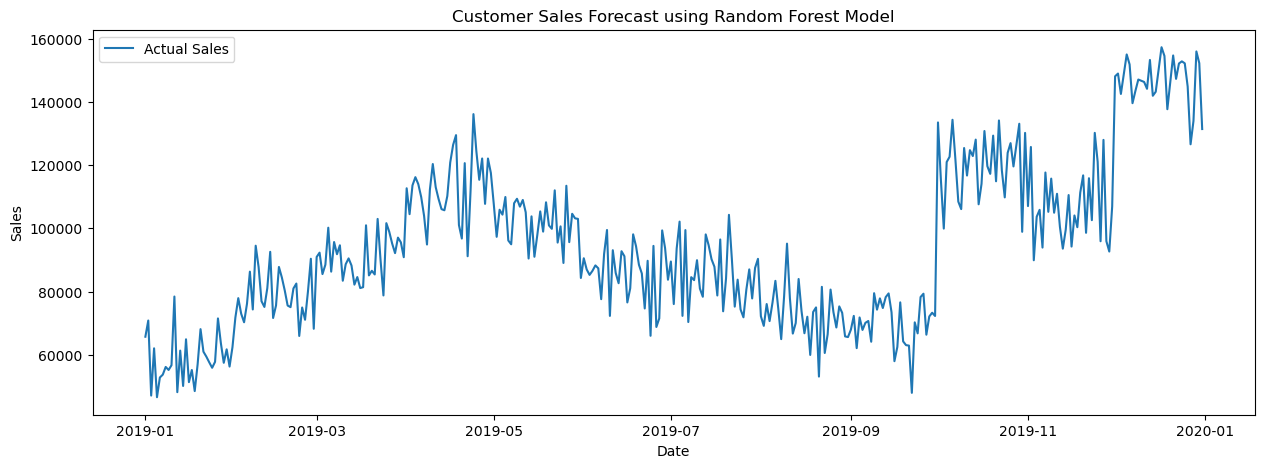

In [47]:
plt.figure(figsize=(15,5))
plt.plot(random_forest_sales['Date'],random_forest_sales['Total Revenue'])
#plt.plot(pred)
plt.title("Customer Sales Forecast using Random Forest Model")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(['Actual Sales', 'Predicted Sales'])
plt.show()

In [46]:
from openpyxl import Workbook 
wb = Workbook()
sheet = wb.active
for index, value in enumerate(pred, start=1):
    sheet.cell(row=index, column=1, value=value)
    
output_file = 'output.xlsx'
wb.save(output_file)

PermissionError: [Errno 13] Permission denied: 'output.xlsx'

In [ ]:
from openpyxl import Workbook 
wb = Workbook()
sheet = wb.active
for index, value in enumerate(y_cv, start=1):
    sheet.cell(row=index, column=1, value=value)
    
output_file = 'output2.xlsx'
wb.save(output_file)

In [ ]:
x_cv